In [22]:
import tensorflow as tf
from tensorflow.keras import datasets , layers ,models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import keras

In [23]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [24]:
x_train.shape

(50000, 32, 32, 3)

In [25]:
x_test.shape

(10000, 32, 32, 3)

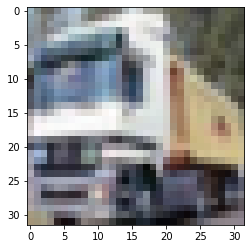

In [26]:
plt.imshow(x_train[1])

In [27]:
classes = [ "airplane" , "automobile" ,"bird", "cat", "deer", "dog" ,"frog" ,"horse" ,"ship" ,"truck"]

In [28]:
 y_train.shape

(50000, 1)

In [29]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [30]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [31]:
classes[9]

'truck'

In [32]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

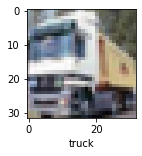

In [33]:
plot_sample(x_train,y_train,1)

In [34]:
x_train =x_train/255
x_test = x_test/255


In [35]:
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000,)


In [36]:
model = keras.Sequential(
    [
     layers.Conv2D(filters=64,kernel_size=(3,3), activation ='relu' ,input_shape=(32,32,3)),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(filters=32,kernel_size=(3,3), activation ='relu'),
     layers.MaxPool2D((2,2)),
     layers.Conv2D(filters=32,kernel_size=(3,3), activation ='relu'),
     layers.MaxPool2D((2,2)),
     keras.layers.Flatten(),
     keras.layers.Dense(32,activation ="relu"),
     keras.layers.Dense(10 ,activation ="softmax"),
     
    ]
)

model.compile(optimizer = "adam",
               loss="sparse_categorical_crossentropy",
               metrics=["accuracy"])
model.fit(x_train,y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 18s 5ms/step - loss: 1.6642 - accuracy: 0.3869
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3460 - accuracy: 0.5134
Epoch 3/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2278 - accuracy: 0.5592
Epoch 4/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1486 - accuracy: 0.5906
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0881 - accuracy: 0.6156


In [37]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np 
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("classification report: \n" , classification_report(y_test, y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.60      0.72      0.65      1000
           1       0.75      0.76      0.75      1000
           2       0.54      0.41      0.46      1000
           3       0.45      0.30      0.36      1000
           4       0.44      0.65      0.52      1000
           5       0.48      0.60      0.53      1000
           6       0.86      0.47      0.61      1000
           7       0.54      0.77      0.64      1000
           8       0.86      0.50      0.63      1000
           9       0.67      0.74      0.71      1000

    accuracy                           0.59     10000
   macro avg       0.62      0.59      0.59     10000
weighted avg       0.62      0.59      0.59     10000



In [38]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1619 - accuracy: 0.5911


[1.1619246006011963, 0.5910999774932861]

In [39]:
model.fit(x_train,y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0374 - accuracy: 0.6335
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0020 - accuracy: 0.6478
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9684 - accuracy: 0.6606
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9420 - accuracy: 0.6706
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9171 - accuracy: 0.6787
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8971 - accuracy: 0.6845
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8789 - accuracy: 0.6927
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8559 - accuracy: 0.7006
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8464 - accuracy: 0.7037
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.830

In [40]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9453 - accuracy: 0.6710


[0.9452818632125854, 0.6710000038146973]

In [41]:
model.fit(x_train,y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8136 - accuracy: 0.7134
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8063 - accuracy: 0.7177
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7903 - accuracy: 0.7238
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7783 - accuracy: 0.7279
Epoch 5/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7667 - accuracy: 0.7303
Epoch 6/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7617 - accuracy: 0.7324
Epoch 7/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7490 - accuracy: 0.7361
Epoch 8/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7428 - accuracy: 0.7396
Epoch 9/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7287 - accuracy: 0.7428
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.723

In [42]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9063 - accuracy: 0.6947


[0.9062859416007996, 0.6947000026702881]

In [43]:
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6419 - accuracy: 0.7753
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6346 - accuracy: 0.7769
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6321 - accuracy: 0.7777
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6243 - accuracy: 0.7812
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6222 - accuracy: 0.7819
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6103 - accuracy: 0.7853
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6076 - accuracy: 0.7865
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6022 - accuracy: 0.7896
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5998 - accuracy: 0.7896
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.594

In [44]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1321 - accuracy: 0.6821


[1.1321446895599365, 0.6820999979972839]

In [45]:
model.fit(x_train,y_train, epochs=70)

Epoch 1/70
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4457 - accuracy: 0.8399
Epoch 2/70
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4420 - accuracy: 0.8397
Epoch 3/70
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4434 - accuracy: 0.8418
Epoch 4/70
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4368 - accuracy: 0.8420
Epoch 5/70
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4354 - accuracy: 0.8437
Epoch 6/70
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4373 - accuracy: 0.8412
Epoch 7/70
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4284 - accuracy: 0.8457
Epoch 8/70
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4319 - accuracy: 0.8438
Epoch 9/70
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4244 - accuracy: 0.8465
Epoch 10/70
1563/1563 [==============================] - 7s 5ms/step - loss: 0.423

In [49]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.0469 - accuracy: 0.6637


[2.046926498413086, 0.6636999845504761]

In [50]:
model.fit(x_train,y_train, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2675 - accuracy: 0.9021
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2634 - accuracy: 0.9028
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2601 - accuracy: 0.9040
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2695 - accuracy: 0.9022
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2635 - accuracy: 0.9050
Epoch 6/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2575 - accuracy: 0.9053
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2634 - accuracy: 0.9044
Epoch 8/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2587 - accuracy: 0.9046
Epoch 9/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2580 - accuracy: 0.9052
Epoch 10/100
1563/1563 [==============================] - 7s 4ms/step - l

In [51]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.5295 - accuracy: 0.6558


[2.5295097827911377, 0.6557999849319458]